# Lab 8.1 functions-practice

# 0. Let's load and install some libraries

In [ ]:
!pip3 install --upgrade pandas

In [ ]:

!pip install xlrd

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns

# 1. Let's load some data

In [28]:
# similar to reading data from csv file, we can read data from excel sheets, we need to specify which column we need to read data from
# this data is a sample from comercial software Tableau
df=pd.read_excel('Superstore.xls',dtype={'Order Date':'str'})
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,variable,value
0,1,CA-2013-152156,2013-11-09 00:00:00,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Sales,261.9600
1,2,CA-2013-152156,2013-11-09 00:00:00,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Sales,731.9400
2,3,CA-2013-138688,2013-06-13 00:00:00,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Sales,14.6200
3,4,US-2012-108966,2012-10-11 00:00:00,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Sales,957.5775
4,5,US-2012-108966,2012-10-11 00:00:00,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Sales,22.3680


In [29]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,variable,value
0,1,CA-2013-152156,2013-11-09 00:00:00,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Sales,261.9600
1,2,CA-2013-152156,2013-11-09 00:00:00,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Sales,731.9400
2,3,CA-2013-138688,2013-06-13 00:00:00,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Sales,14.6200
3,4,US-2012-108966,2012-10-11 00:00:00,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Sales,957.5775
4,5,US-2012-108966,2012-10-11 00:00:00,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Sales,22.3680


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39976 entries, 0 to 39975
Data columns (total 19 columns):
Row ID           39976 non-null int64
Order ID         39976 non-null object
Order Date       39976 non-null object
Ship Date        39976 non-null datetime64[ns]
Ship Mode        39976 non-null object
Customer ID      39976 non-null object
Customer Name    39976 non-null object
Segment          39976 non-null object
Country          39976 non-null object
City             39976 non-null object
State            39976 non-null object
Postal Code      39976 non-null int64
Region           39976 non-null object
Product ID       39976 non-null object
Category         39976 non-null object
Sub-Category     39976 non-null object
Product Name     39976 non-null object
variable         39976 non-null object
value            39976 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(15)
memory usage: 6.1+ MB


### For each of the following tasks using pandas apply

### **Task 1**. Create a new columns in the dataset that shows 'true' if the order was made in the US, and 'false' if made in other places (e.g., Canada). Use order ID

In [31]:
df['US']=df['Order ID'].apply(lambda x:x[:3]=='US-')

### **Task 2**. Create a new column that shows how many years has passed since the order was created

In [37]:
def year_calc(x):
    year=x[:4]
    return 2021-int(year)
df['order_age']=df['Order Date'].apply(year_calc)


### **Task 3**. Create a new column that discretize the value of sales to low: <200, mid: >200 and <1000, high: >1000

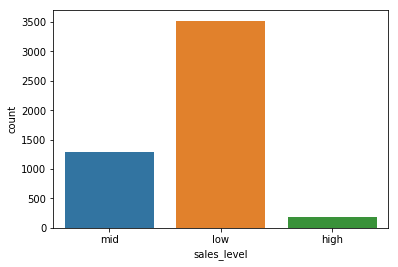

In [59]:
def discretize(x):
    if x<200:
        return 'low'
    if x>1000:
        return 'high'
    return 'mid'


df[(df['variable']=='Sales')]['value'].apply(discretize)
df_pivoted=pd.pivot_table(df,index='Order ID',columns='variable',values='value')
df_pivoted.reset_index(inplace=True)
df_pivoted['sales_level']=df_pivoted['Sales'].apply(discretize)
sns.countplot(data=df_pivoted,x='sales_level')

### **Task 4**. Create a new columns that contains only first name and last names of custerms, i.e. remove the middle names

In [60]:
def mid_name_remover(x):
    xs=x.split(' ')
    return (xs[0]+' '+xs[-1])
df['Customer Name no midname']=df['Customer Name'].apply(mid_name_remover)

### **Task 5**. calculate profit margin per number of product sold

In [70]:
df_pivoted['profit_margin_perunit']=df_pivoted.apply(lambda row:(row['Profit']/row['Sales'])/(row['Quantity']),axis=1)